In [ ]:
pip install streamlit

In [ ]:
import pandas_datareader as data
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import streamlit as st

In [ ]:
end_date=datetime.today().date()
start_date= (end_date - pd.DateOffset(years=10)).date()
print(start_date)
print(end_date)

2015-08-13
2025-08-13


In [ ]:
st.title('Stock Trend Prediction')
user_input=st.text_input('Enter Stock Ticker','AAPL')

2025-08-13 15:09:06.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:06.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:09:07.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
df= yf.download('AAPL',start_date,end_date)


/tmp/ipython-input-276702409.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download('AAPL',start_date,end_date)
[*********************100%***********************]  1 of 1 completed


In [ ]:
#describing the data
st.subheader('Data from 2015-2025')
st.write(df.describe())

2025-08-13 15:04:55.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:04:55.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:04:55.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:04:55.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:04:55.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 15:04:55.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-13,25.877148,26.158055,25.740065,26.077153,194143200
1,2015-08-14,26.059174,26.137827,25.620959,25.690624,171718000
2,2015-08-17,26.328846,26.438961,25.955801,26.077153,163538800
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
4,2015-08-19,25.845684,26.185018,25.771524,26.090634,193146000


In [ ]:
df=df.drop(['Date'],axis=1)
df.head()

/tmp/ipython-input-3471825329.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,25.877148,26.158055,25.740065,26.077153,194143200
1,26.059174,26.137827,25.620959,25.690624,171718000
2,26.328846,26.438961,25.955801,26.077153,163538800
3,26.180531,26.391773,26.070415,26.164800,138242800
4,25.845684,26.185018,25.771524,26.090634,193146000


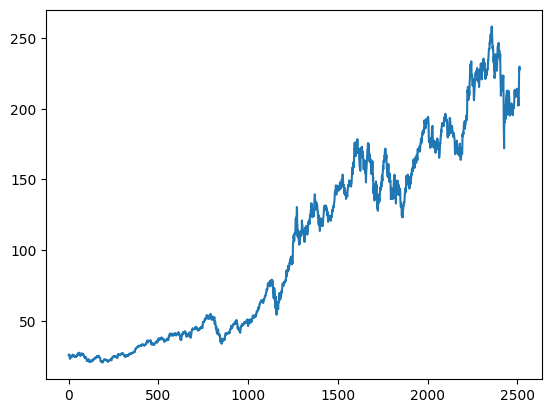

In [ ]:
plt.plot(df['Close'])
plt.show()

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2509,205.744943
2510,205.813061
2511,205.969187
2512,206.119280


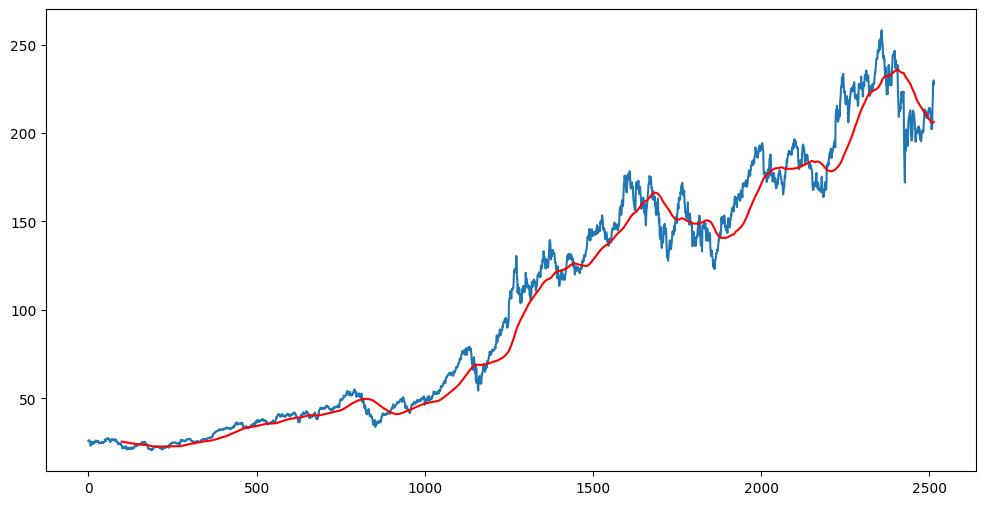

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.show()

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2509,220.613600
2510,220.557130
2511,220.533023
2512,220.492000


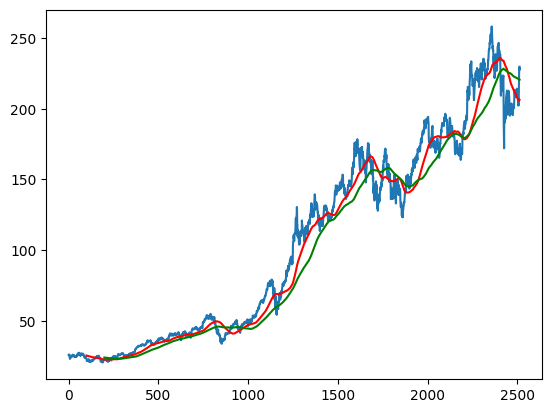

In [ ]:
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [ ]:
df.shape

(2514, 5)

In [ ]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [ ]:
data_training.head()

Ticker,AAPL
0,25.877148
1,26.059174
2,26.328846
3,26.180531
4,25.845684


In [ ]:

data_testing.head()

Ticker,AAPL
1759,162.357117
1760,166.610001
1761,165.871643
1762,169.425552
1763,170.498581


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array


array([[0.03328554],
       [0.03443893],
       [0.03614767],
       ...,
       [0.90219022],
       [0.90075541],
       [0.89776136]])

In [ ]:
data_training_array.shape

(1759, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 449ms/step - loss: 0.0850
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 283ms/step - loss: 0.0087
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - loss: 0.0062
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 282ms/step - loss: 0.0049
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 0.0057
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0069
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 0.0058
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 456ms/step - loss: 0.0049
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 286ms/step - loss: 0.0056
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - loss: 0.0060


In [ ]:
model.save('my_model.keras')

In [ ]:
data_testing.head()

Ticker,AAPL
1759,162.357117
1760,166.610001
1761,165.871643
1762,169.425552
1763,170.498581


In [ ]:
data_training.tail(100)

Ticker,AAPL
1659,156.661850
1660,157.672943
1661,160.971283
1662,162.345612
1663,165.722488
...,...
1754,157.304916
1755,163.321442
1756,163.006882
1757,162.780441


In [ ]:
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days, data_testing], ignore_index=True)
display(final_df.head())

Ticker,AAPL
0,156.661850
1,157.672943
2,160.971283
3,162.345612
4,165.722488


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[2.47588807e-01],
       [2.55088252e-01],
       [2.79552584e-01],
       [2.89746207e-01],
       [3.14793061e-01],
       [3.24913684e-01],
       [3.53018919e-01],
       [3.57751414e-01],
       [3.64158927e-01],
       [3.88623146e-01],
       [3.79958884e-01],
       [3.56950687e-01],
       [3.54766032e-01],
       [3.84837264e-01],
       [3.60226933e-01],
       [3.36708987e-01],
       [3.38966188e-01],
       [3.24039732e-01],
       [2.92440271e-01],
       [3.06347117e-01],
       [3.26297159e-01],
       [2.89090799e-01],
       [2.87489232e-01],
       [3.04454006e-01],
       [3.03216303e-01],
       [2.97318538e-01],
       [2.63607082e-01],
       [2.71543503e-01],
       [2.27274561e-01],
       [2.25599995e-01],
       [2.77077065e-01],
       [2.33463643e-01],
       [2.35720392e-01],
       [2.46787741e-01],
       [2.94406042e-01],
       [2.27056017e-01],
       [2.32451955e-01],
       [1.94389184e-01],
       [2.12253828e-01],
       [1.53846593e-01],


In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#making prediction

y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([2.89831542e-01, 3.21375886e-01, 3.15899366e-01, 3.42259298e-01,
       3.50218129e-01, 3.49050029e-01, 3.60148954e-01, 3.57228083e-01,
       3.38024330e-01, 3.09181747e-01, 3.06698984e-01, 3.08889411e-01,
       3.27144176e-01, 2.80339277e-01, 2.63982717e-01, 2.45947289e-01,
       2.33606925e-01, 2.39010333e-01, 2.23311104e-01, 2.13964724e-01,
       2.24406544e-01, 2.13453730e-01, 2.34702252e-01, 2.78951615e-01,
       2.08926539e-01, 2.19660242e-01, 1.98192496e-01, 1.85998357e-01,
       2.13599842e-01, 2.31270274e-01, 2.08050209e-01, 2.00894483e-01,
       1.84026928e-01, 1.86509691e-01, 1.93738530e-01, 1.79718734e-01,
       1.25976880e-01, 9.47248727e-02, 1.25757769e-01, 1.52409812e-01,
       1.54600239e-01, 1.47517398e-01, 1.08525558e-01, 1.10934869e-01,
       1.00420390e-01, 9.57470871e-02, 1.29700968e-01, 9.60391968e-02,
       1.25465660e-01, 1.35250374e-01, 1.36053591e-01, 1.32621726e-01,
       1.60952975e-01, 1.76870975e-01, 1.97973725e-01, 1.76140870e-01,
      

In [ ]:
y_predicted

array([[0.18172623],
       [0.18946905],
       [0.1974379 ],
       [0.20558806],
       [0.213928  ],
       [0.2224821 ],
       [0.23124534],
       [0.24020529],
       [0.24931166],
       [0.25842696],
       [0.26730382],
       [0.2756804 ],
       [0.2833437 ],
       [0.29019952],
       [0.29610318],
       [0.30090287],
       [0.30446455],
       [0.3066934 ],
       [0.3075849 ],
       [0.3071808 ],
       [0.30555302],
       [0.3028365 ],
       [0.29918295],
       [0.29480368],
       [0.290018  ],
       [0.2850034 ],
       [0.27988696],
       [0.27471998],
       [0.2695023 ],
       [0.26427916],
       [0.25915113],
       [0.25418344],
       [0.24940555],
       [0.24479641],
       [0.24032702],
       [0.2359891 ],
       [0.23176087],
       [0.22752061],
       [0.22308528],
       [0.21835972],
       [0.21335863],
       [0.2081583 ],
       [0.2028517 ],
       [0.19747303],
       [0.19204588],
       [0.18658243],
       [0.18109252],
       [0.175

In [ ]:
scaler.scale_

array([0.00741717])

In [ ]:
scale_factor=1/0.00741717
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

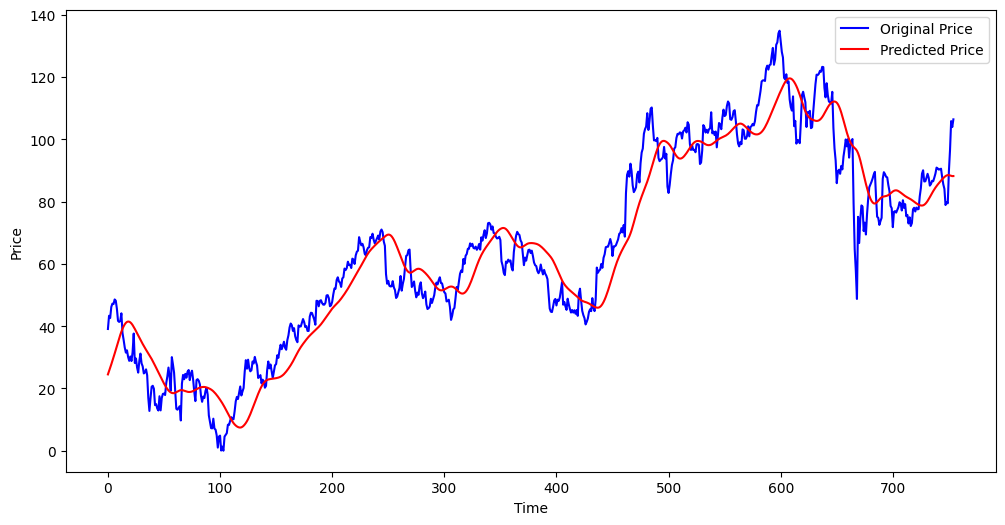

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()